In [1]:
#Dataset (6.2 million games) https://www.kaggle.com/datasets/arevel/chess-games

#import dependancies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
df = pd.read_csv('lotta_chess_games.csv')
#define dataframe of my dataset as 'df'


In [3]:
df['Result'].replace('*', 0.5, inplace = True)
df['Result'].replace('1/2-1/2', 0.5, inplace = True)
df['Result'].replace('1-0', 1, inplace = True)
df['Result'].replace('0-1', 0, inplace = True)
df['Result'].unique()
#Making my 'Result' column quantitative values so I can calculate the mean of them.

array([1. , 0. , 0.5])

In [297]:
#split my dataframe into three seperate groups, low, medium, and high for elo.
low_df = df[(df['WhiteElo'] <= 1500)&(df['BlackElo'] <= 1500)]
med_df = df[(df['WhiteElo'] <= 2000)&(df['WhiteElo'] >= 1500)&(df['BlackElo'] <= 2000)&(df['BlackElo'] >= 1500)]
high_df = df[df['WhiteElo'] >= 2000&(df['BlackElo'] >= 2000)]

In [418]:
low_dfr.head()

,Result,counts
0,1.0,342752
1,0.0,317009
2,0.5,23194


<BarContainer object of 30 artists>

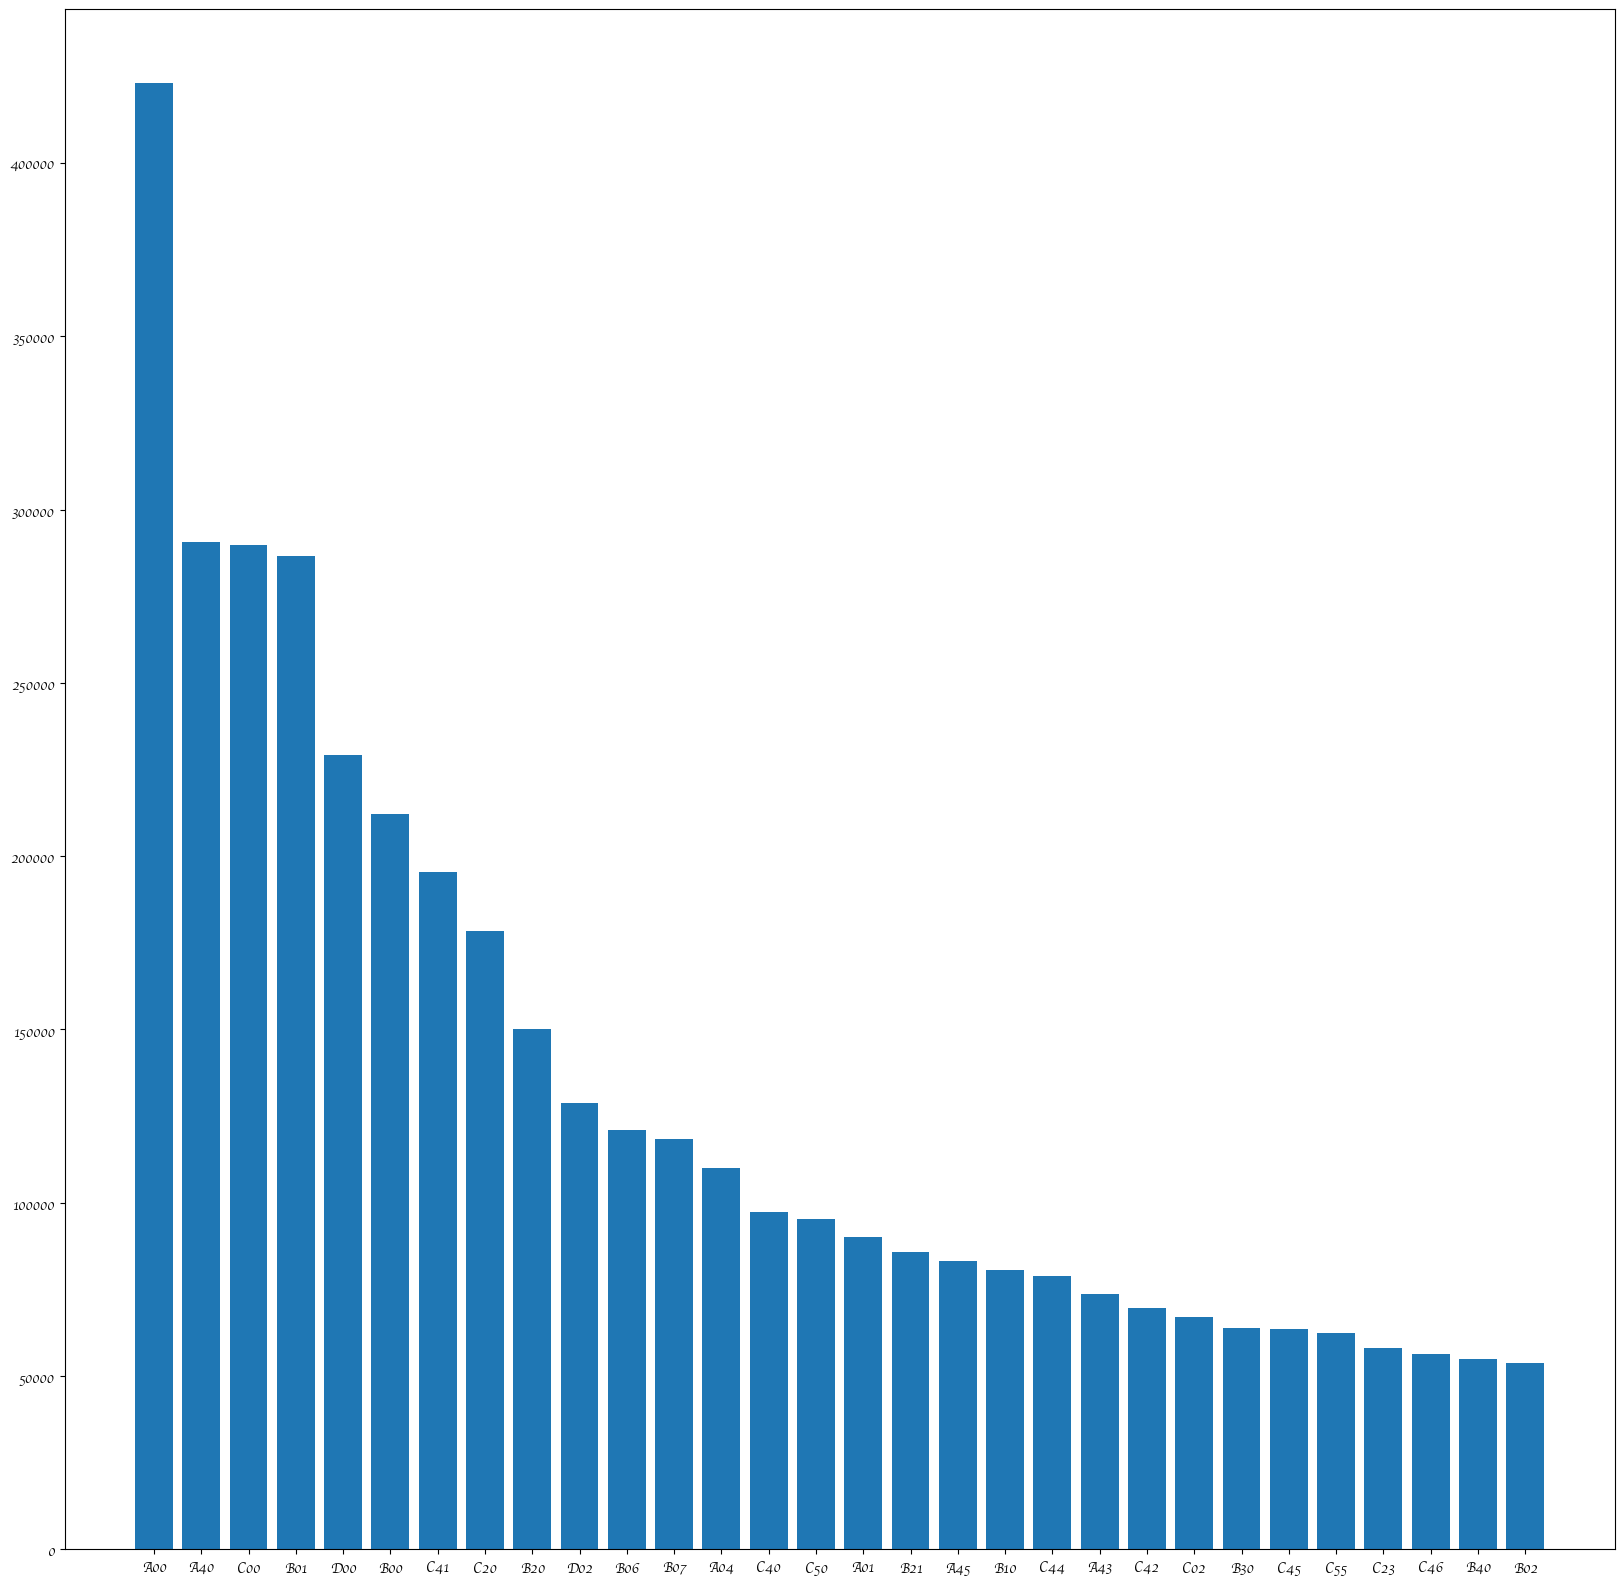

In [312]:
low_df2 = low_df['ECO'].value_counts().rename_axis('ECO').reset_index(name = 'counts')
med_df2 = med_df['ECO'].value_counts().rename_axis('ECO').reset_index(name = 'counts')
high_df2 = high_df['ECO'].value_counts().rename_axis('ECO').reset_index(name = 'counts')
# Creates new dataframe consisting of 'ECO' (opening in code) and how many times the opening was played

plt.figure(figsize = (20,20))
plt.bar(high_df2['ECO'].head(30), high_df2['counts'].head(30))
#create bar graph of 30 most frequently placed openings for refrence
#i did this for low_df2 and med_df2 as well



In [38]:
#i didnt use funtion_lmh or funtion_all for my actual data analysis, 
#just made it in the process of making funtion_low, med, and high
def funtion_lmh (code):
    newdf_l = low_df[low_df['ECO'] == code]
    newdf_m = med_df[med_df['ECO'] == code]
    newdf_h = high_df[high_df['ECO'] == code]    
    low = newdf_l.groupby('ECO')[['Result']].mean()
    med = newdf_m.groupby('ECO')[['Result']].mean()
    high = newdf_h.groupby('ECO')[['Result']].mean()
    merge1 = [low, med, high]
    merged = pd.concat(merge1)
    return merged   
def funtion_all (code):
    newdf = df[df['ECO'] == code]   
    grouped = newdf.groupby('ECO')[['Result']].mean()
    return grouped
    

def funtion_low (code): 
    newdf = low_df[low_df['ECO'] == code] #create a new data frame for the specified 'ECO' code
    grouped = newdf.groupby('ECO')[['Result']].mean() 
    #use .groupby to create a new dataframe consisting of the specified 'ECO' code and the mean of the result.
    #since I previously made white wins (1-0) become 1 and black wins (0-1) become 0 and draws (1/2-1/2)
    #i could just calculate the mean to get the win rate for white
    return grouped #return created dataframe
def funtion_med (code): #same thing as funtion_low but for med_df instead of low_df
    newdf = med_df[med_df['ECO'] == code]   
    grouped = newdf.groupby('ECO')[['Result']].mean()
    return grouped
def funtion_high (code): #same thing as funtion_low but for high_df instead of low_df
    newdf = high_df[high_df['ECO'] == code]   
    grouped = newdf.groupby('ECO')[['Result']].mean()
    return grouped

In [328]:
A00 = funtion_low('A00') # I manually defined each of the 30 most frequently played openings as the code name
C20 = funtion_low('C20')#For example, if 'E12' was part of the 30 most frequently played openings for low rated games,
B01 = funtion_low('B01')# I would do E12 = funtion_low('E12')
D00 = funtion_low('D00')
C00 = funtion_low('C00')
C41 = funtion_low('C41')
A40 = funtion_low('A40')
B00 = funtion_low('B00')
B20 = funtion_low('B20')
C40 = funtion_low('C40')
D02 = funtion_low('D02')
C44 = funtion_low('C44')
C50 = funtion_low('C50')
C42 = funtion_low('C42')
B07 = funtion_low('B07')
B06 = funtion_low('B06')
C46 = funtion_low('C46')
C23 = funtion_low('C23')
A04 = funtion_low('A04')
C55 = funtion_low('C55')
B21 = funtion_low('B21')
C21 = funtion_low('C21')
B10 = funtion_low('B10')
A45 = funtion_low('A45')
A01 = funtion_low('A01')
D20 = funtion_low('D20')
C02 = funtion_low('C02')
C45 = funtion_low('C45')
B02 = funtion_low('B02')
B30 = funtion_med('B30')

In [298]:
A00m = funtion_med('A00') # Same thing as above, except I added m after each variable because 
C20m = funtion_med('C20') # there were many repeated values in the top 30 most frequented openings for med and low
B01m = funtion_med('B01')
D00m = funtion_med('D00')
C00m = funtion_med('C00')
C41m = funtion_med('C41')
A40m = funtion_med('A40')
B00m = funtion_med('B00')
B20m = funtion_med('B20')
C40m = funtion_med('C40')
D02m = funtion_med('D02')
C44m = funtion_med('C44')
C50m = funtion_med('C50')
C42m = funtion_med('C42')
B07m = funtion_med('B07')
B06m = funtion_med('B06')
C23m = funtion_med('C23')
A04m = funtion_med('A04')
C55m = funtion_med('C55')
B21m = funtion_med('B21')
B10m = funtion_med('B10')
A45m = funtion_med('A45')
A01m = funtion_med('A01')
D20m = funtion_med('D20')
C02m = funtion_med('C02')
C45m = funtion_med('C45')
A43m = funtion_med('A43')
A30m = funtion_med('A30')
B40m = funtion_med('B40')
C01m = funtion_med('C01')

In [40]:
A00h = funtion_high('A00') # Same thing.
B01h = funtion_high('B01')# creating a loop to do this might not have actually been faster I actually did this quickly
D00h = funtion_high('D00') 
C00h = funtion_high('C00')
C41h = funtion_high('C41')
A40h = funtion_high('A40')
B00h = funtion_high('B00')
B20h = funtion_high('B20')
D02h = funtion_high('D02')
C50h = funtion_high('C50')
B07h = funtion_high('B07')
B06h = funtion_high('B06')
B21h = funtion_high('B21')
B10h = funtion_high('B10')
A45h = funtion_high('A45')
A01h = funtion_high('A01')
C02h = funtion_high('C02')
C45h = funtion_high('C45')
A43h = funtion_high('A43')
B40h = funtion_high('B40')
C01h = funtion_high('C01')
C20h = funtion_high('C20')
B23h = funtion_high('B23')
B12h = funtion_high('B12')
A46h = funtion_high('A46')
B02h = funtion_high('B02')
A41h = funtion_high('A41')
B30h = funtion_high('B30')
A10h = funtion_high('A10')
B22h = funtion_high('B22')

In [348]:
high_li = [A00h, B01h, D00h, C00h, C41h, A40h, B00h, B20h, D02h, C50h, B07h, B06h, B21h, B10h, A45h, A01h, C02h, C45h, A43h, B40h, C01h, C20h, B23h, B12h, A46h, B02h, A41h, B30h, A10h, B22h]
high_list = pd.concat(high_li)

# First, I created a list consisting of all the 30 opening data frames.
# They all just had one row, consisting of 'ECO' which had their code and the win rate of White under 'Result'
# I then used .concat the join all the data frames together, creating one big data frame
# The big data frame consisted of the top 30 most frequented openings and their respective White win rate


In [330]:
low_li = [A00, C20, B01, D00, C00, C41, A40, B00, B20, C40, D02, C44, C50, C42, B07, B06, C46, C23, A04, C55, B21, C21, B10, A45, A01, D20, C02, C45, B02, B30]
low_list = pd.concat(low_li)

# Same as above, but for low instead of high

In [299]:
med_li = [A00m, C20m, B01m, D00m, C00m, C41m, A40m, B00m, B20m, C40m, D02m, C44m, C50m, C42m, B07m, B06m, C23m, A04m, C55m, B21m, B10m, A45m, A01m, D20m, C02m, C45m, A43m, A30m, B40m, C01m]
med_list = pd.concat(med_li)

# Same as above, but for med instead of low

In [331]:
low_list['Code'] = 'A00'
low_list['Code'] = ['A00', 'C20', 'B01', 'D00', 'C00', 'C41', 'A40', 'B00', 'B20', 'C40', 'D02', 'C44', 'C50', 'C42', 'B07', 'B06', 'C46', 'C23', 'A04', 'C55', 'B21', 'C21', 'B10', 'A45', 'A01', 'D20', 'C02', 'C45', 'B02', 'B30']

# I may have just been doing something wrong at the time, but plotting a graph wasn't working with my 'ECO' column
# I thought it may have had to do with .groupby, so I created a new column in the data frame
# I first made a new column just consisting of 'A00', then manually entered each column name
# I checked to make sure they were consistent and correct

In [305]:
med_list['Code'] = 'A00'
med_list['Code'] = ['A00', 'C20', 'B01', 'D00', 'C00', 'C41', 'A40', 'B00', 'B20', 'C40', 'D02', 'C44', 'C50', 'C42', 'B07', 'B06', 'C23', 'A04', 'C55', 'B21', 'B10', 'A45', 'A01', 'D20', 'C02', 'C45', 'A43', 'A30', 'B40', 'C01']

# Same as above, but with med instead of low


In [349]:
high_list['Code'] = 'A00'
high_list['Code'] = ['A00', 'B01', 'D00', 'C00', 'C41', 'A40', 'B00', 'B20', 'D02', 'C50', 'B07', 'B06', 'B21', 'B10', 'A45', 'A01', 'C02', 'C45', 'A43', 'B40', 'C01', 'C20', 'B23', 'B12', 'A46', 'B02', 'A41', 'B30', 'A10', 'B22']

# Same as above, but with high instead of med

In [420]:
# Quirky font for design bonus points + 1
plt.rcParams.update({'font.family':'cursive'}) # Chose cursive 

In [229]:
print(plt.rcParams['font.family']) # Checking which family I chose to see if it worked 

['cursive']


In [351]:
low_list_white = low_list[low_list['Result'] > 0.5 ]
low_list_black = low_list[low_list['Result'] < 0.5 ]
med_list_white = med_list[med_list['Result'] > 0.5 ]
med_list_black = med_list[med_list['Result'] < 0.5 ]
high_list_white = high_list[high_list['Result'] > 0.5 ]
high_list_black = high_list[high_list['Result'] < 0.5 ]
# I wanted to seperate the data frames into good for White, and good for Black
# >0.5 for White, and <0.5 for Black
# I don't know why I keep naming them list 
# NOTE: I don't use this in my data analysis on the slides, but I might mention it.


In [352]:
print(len(low_list_white),len(low_list_black),len(med_list_white),len(med_list_black),
      len(high_list_white),len(high_list_black))
# Length of each data frame, to see which side the 'low_list', 'med_list', 'high_list' favors as a whole

22 8 22 8 18 12


In [283]:
def plot_bar_grpah(dfa,dfb,w,b,c): # Defing a function to plot the bar graph
    # I only really specifically wanted to use this function for 
    # low_list_white and low_list_black, med_list_white, etc 
    # dfa and dfb would be the two lengths of dataset I would want to compare
    # w = 'White', b = 'Black' (dont know why I didn't just put this in the function), for the bar names.
    # c = color 
    plotdata = pd.DataFrame( 
        {"Openings that support this side": [len(dfa),len(dfb)]}, 
        index=[w,b])
    plotdata.plot(kind="bar",figsize=(5,5),color=c)
    


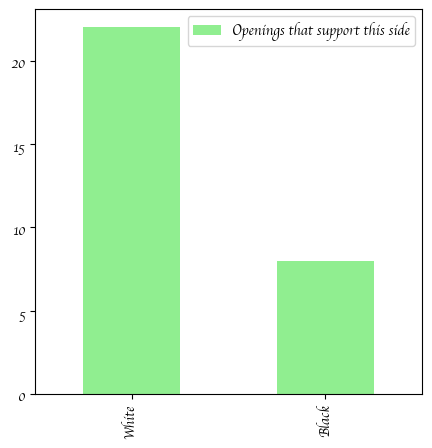

In [422]:
plot_bar_grpah(low_list_white,low_list_black,'White','Black','lightgreen') 
# Plotting a bar graph comparing the amount of openings supporting White vs Black in low elo games

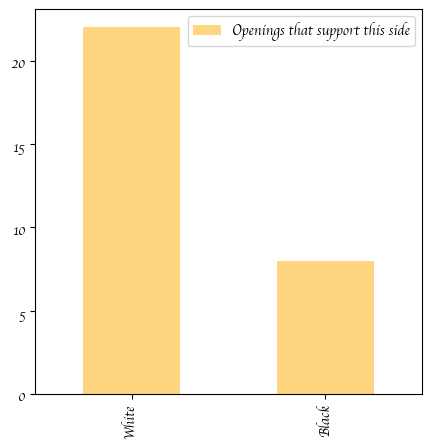

In [353]:
plot_bar_grpah(med_list_white,med_list_black,'White','Black','#FFD580')
# Same as above but with moderate elo games instead of low elo games
# They actually do have the same values it's just a coincidince

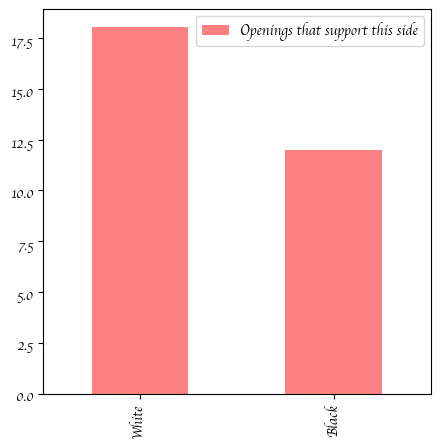

In [354]:
plot_bar_grpah(high_list_white,high_list_black,'White','Black','#FF8080')
# Same as above but with high elo games instead of moderate elo games

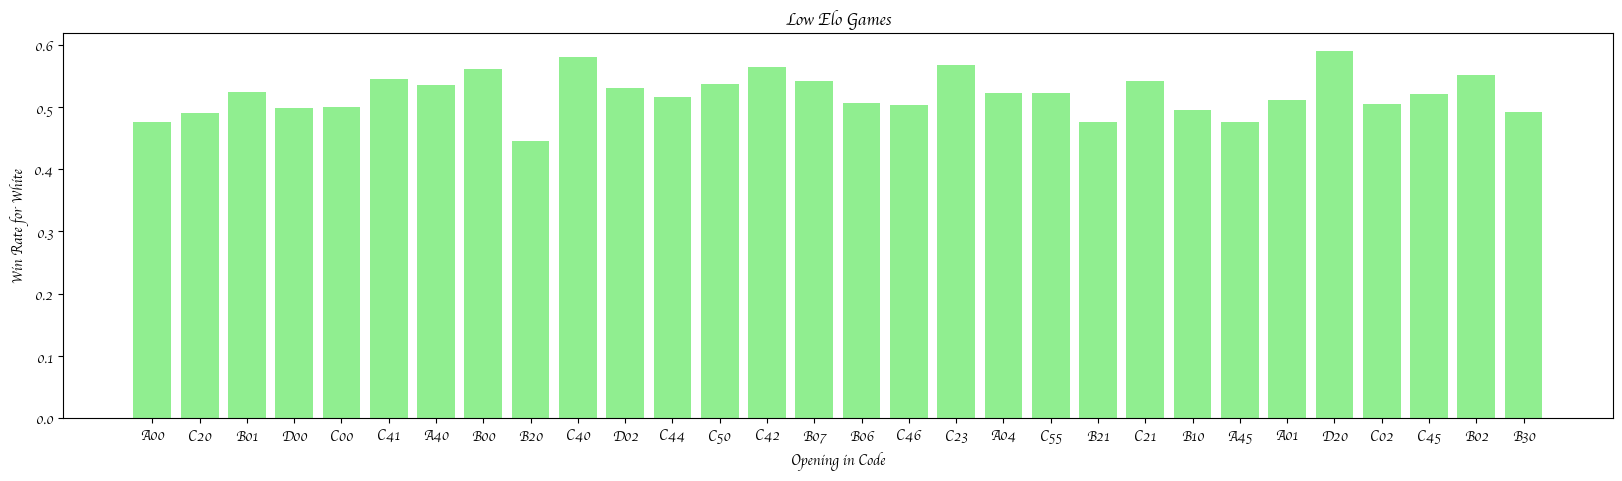

In [423]:
plt.figure(figsize = (20,5)) # Size of graph, rectagular seemed to fit the graph
plt.bar(low_list['Code'], low_list['Result'], color='lightgreen')
# Plotting of the actual graph. Win Rate of White against Opening in Code. Color as well
plt.title("Low Elo Games") # title
plt.xlabel("Opening in Code") # x axis label
plt.ylabel("Win Rate for White") # y axis label
plt.savefig('lowelo.png', dpi = 1000) # saving the image as png so I could use it in my slides as a good resolution
# The dpi is the resolution
plt.show()



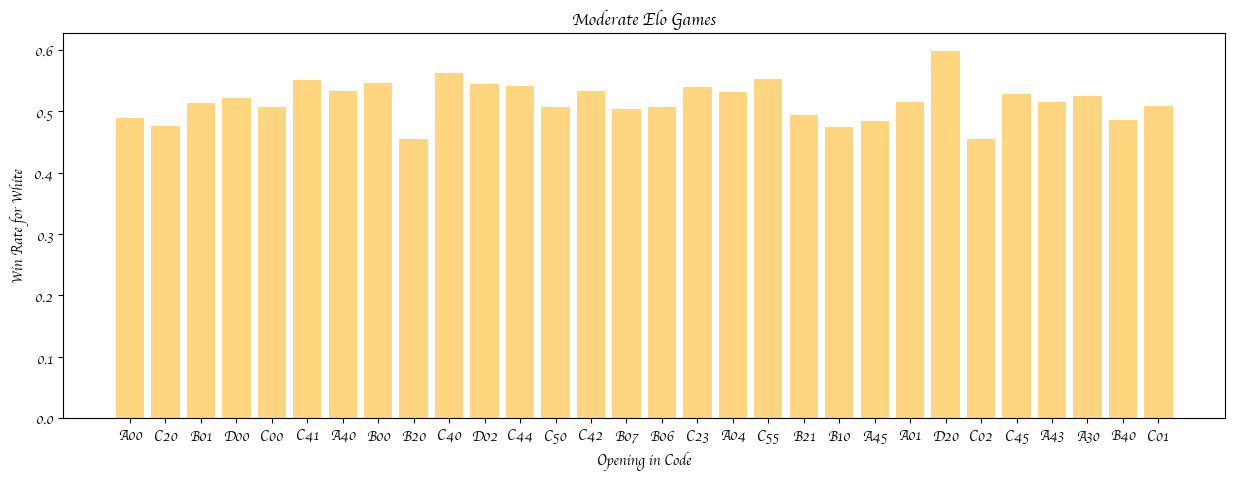

In [379]:
plt.figure(figsize = (15,5)) # just noticed the figsize is different
plt.bar(med_list['Code'], med_list['Result'], color = '#FFD580')

plt.title("Moderate Elo Games")
plt.xlabel("Opening in Code")
plt.ylabel("Win Rate for White")
plt.savefig('medelo.png', dpi = 1000)
plt.show()

# Same as above, just with moderate elo games. Labels are changed a bit.

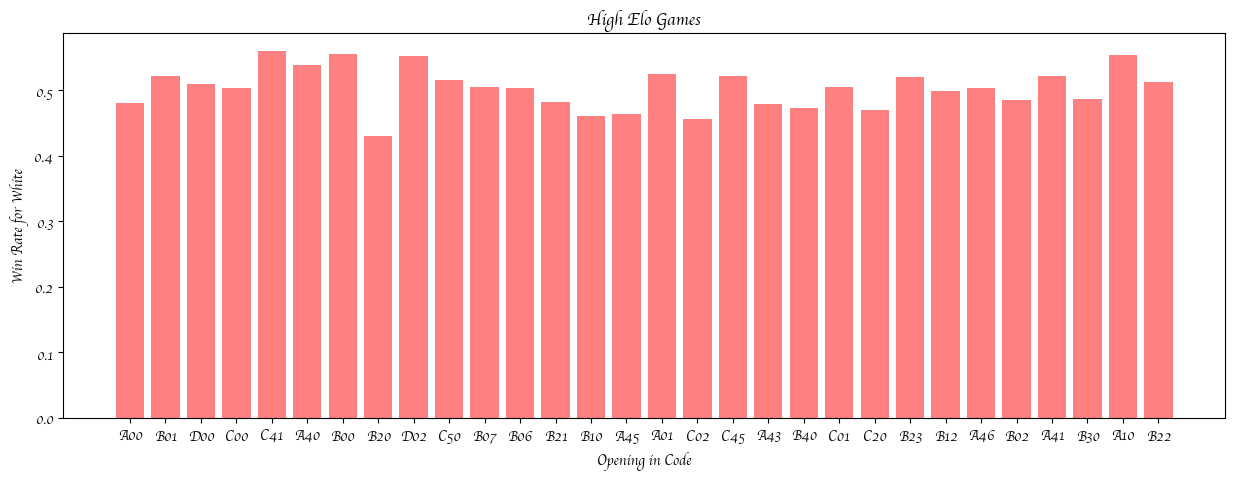

In [380]:
plt.figure(figsize = (15,5))
plt.bar(high_list['Code'], high_list['Result'], color = '#FF8080')


plt.title("High Elo Games")
plt.xlabel("Opening in Code")
plt.ylabel("Win Rate for White")
plt.savefig('highelo.png', dpi = 1000)
plt.show()
#same as above, just with High elo games.

In [425]:
# This function basically produces a data frame ready and primed to be plotted into a scatter plot
# Some variable names are not that descriptive
def scat(eco_or_opening_name, code, maxx, x, incr ): # scat as in scatter
    #So basically the 'ECO' is just an opening but in code. However, there are many sub variation in that singular ECO
    # So I made eco_or_opening_name so I could specify whether I wanted to do the scatter plot using an ECO code
    # or with a specific opening name
    adf = df[df[eco_or_opening_name] == code]
    # code here can be a code like 'B20' or an opening name like 'Bishop's Opening'
    # creates a new data frame only consisting of the 'code' I want
    elo = []
    mean_list = []
    # Creates empty lists so I can add to them later
    while x < maxx: # maxx = maximum elo I would go up to, x = elo I would start at
        ye = adf[(adf['WhiteElo'] < x+incr)&(adf['WhiteElo'] >= x)&(adf['BlackElo'] <= x+incr)&(adf['BlackElo'] >= x)]
        # incr = the size of the increment I would go up.
        # ye is a new data frame consiting of values between x and x + incr for elo
        # idk why I named it ye
        
        if ye.empty == False: # if ye has something, put the mean of the result into 'mean_list'
            mean_list.append(ye['Result'].mean())
            elo.append(x) # put the elo without incr that ye was looking at into 'elo' 
        x+=incr # x = x +incr then repeat :)
    omega_df = pd.DataFrame({'elo':elo,'mean':mean_list})  
    # create the omega data frame consiting of the elo values that were looked at and the mean of the result
    # Now we have two quantitative values for any certain opening or code, 'elo', and 'win rate for white'
    return omega_df # return the omega data frame

# finally we can compare how the win rate for an opening changes as elo increases.


In [426]:
def line(a, title): # This function plots the scatter plot and creates the linear regrssion line and the summary data
    x_ary = a['elo']
    x_with_cnst = sm.add_constant(x_ary)
    model = sm.OLS(a['mean'], x_with_cnst)
    results = model.fit()
    b,m = results.params # get m and b
    plt.figure(figsize = (10,5)) # figsize
    plt.title(title) #title
    plt.xlabel('Elo') # x axis label
    plt.ylabel('Win Rate for White') # y axis label 
    plt.scatter(a['elo'], a['mean'], c='lightblue',s=100,marker='*') # quirky design choices and plot the scatter plot
    plt.plot(x_ary, m*x_ary+b, color='green', linestyle='dashed', marker='|', markerfacecolor='blue', markersize=1, markeredgecolor="orange", markeredgewidth=5)
    # plot the linear regression line and quirky design choices
    plt.savefig('scatter.png', dpi = 1000) # save image 
    print(results.summary()) # print summary


                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     6.343
Date:                Fri, 15 Jul 2022   Prob (F-statistic):             0.0174
Time:                        00:45:48   Log-Likelihood:                 51.595
No. Observations:                  32   AIC:                            -99.19
Df Residuals:                      30   BIC:                            -96.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3716      0.055      6.726      0.0

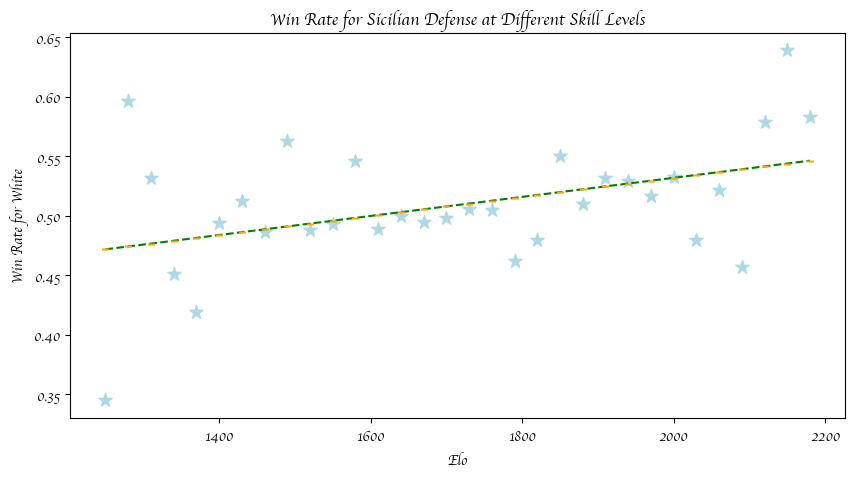

In [427]:

line(scat('ECO','B30', 2200, 1250, 30),'Win Rate for Sicilian Defense at Different Skill Levels')
# i did it 

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     8.420
Date:                Fri, 15 Jul 2022   Prob (F-statistic):            0.00638
Time:                        00:46:02   Log-Likelihood:                 24.075
No. Observations:                  37   AIC:                            -44.15
Df Residuals:                      35   BIC:                            -40.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8020      0.105      7.654      0.0

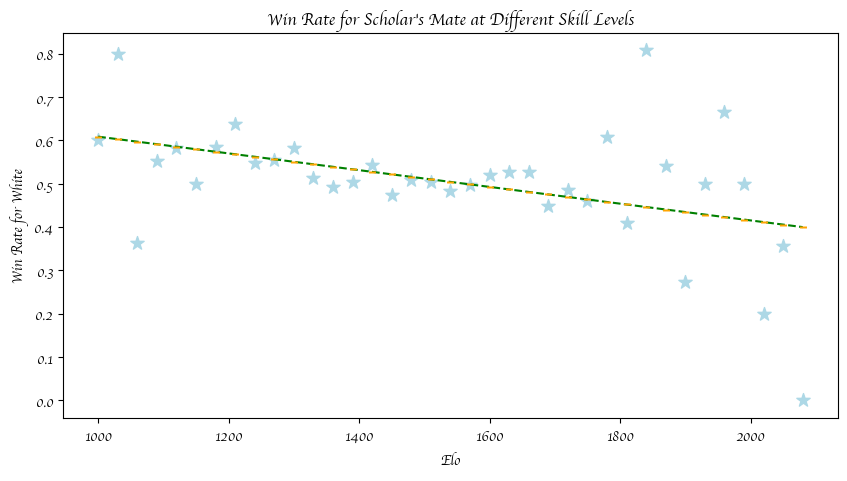

In [429]:
line(scat('Opening', "King's Pawn Game: Wayward Queen Attack", 2100, 1000, 30), "Win Rate for Scholar's Mate at Different Skill Levels")
# I now have a scatter plot.



In [ ]:
all = funtion_all(df['ECO']) # dont mind this

In [ ]:
all_white = all[all['Result'] > 0.5]# dont mind this
all_black = all[all['Result'] < 0.5]# dont mind this

In [ ]:
len(all_black)# dont mind this

In [ ]:
len(all_white)# dont mind this

In [ ]:
plt.scatter(df['WhiteElo'], df['BlackElo'])# dont mind this

In [ ]:
plt.figure(figsize = (20,20))# dont mind this
plt.scatter(all['Result'], all['Result'])# dont mind this